## 第二次作業

在這次作業一開始，我強迫自己完全自己思考，只要一有問題我就去看一次老師上課撥的影片

每看完一次就在紙上寫出自己的想法，只要一停頓就回去再看一次小綠人影片

光是寫Merge Sort，大概那個影片就看了20次以上

影片網址:https://www.youtube.com/watch?v=es2T6KY45cA

以下開始我的學習歷程

### 整體想法

一開始，根據影片內容，我認為在Merge Sort中，要先把整個list從中間分兩堆，直到每一堆裡都只有一個數(如圖)

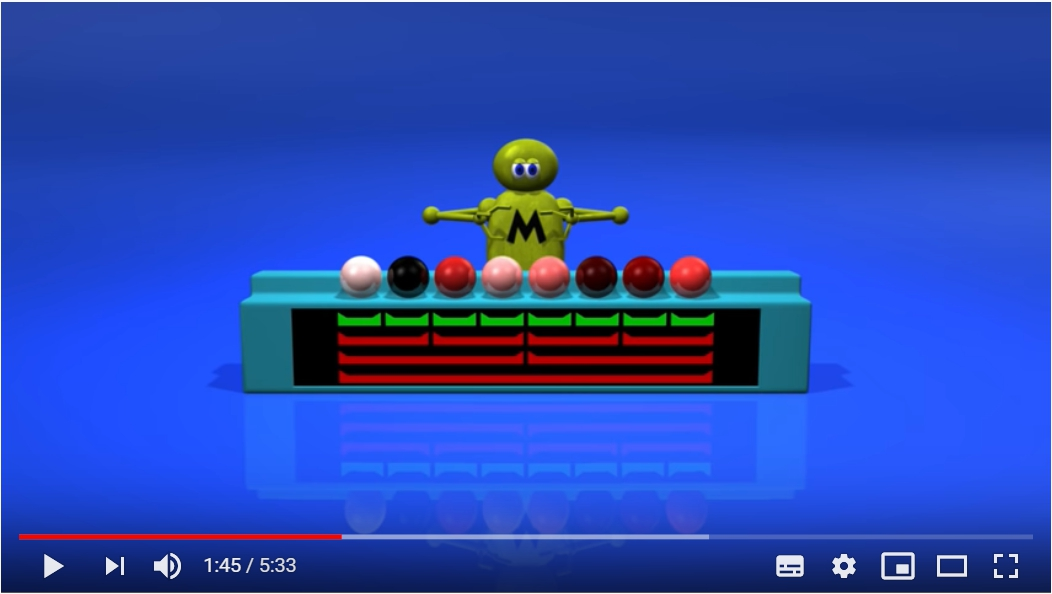

In [6]:
from IPython.display import Image
Image(filename='C:/Users/User/Desktop/merge_sort_green.jpg')

(這裡使用程式碼叫出圖片，避免在jupyter 或 github上跑不出來)

(參考網址:https://www.jianshu.com/p/49a0c9f74d59)

當每一堆都只有一個數之後，兩個兩個互相比較大小，比完大小之後，依照小的在左大的在右的規則

將比完大小的數字合併起來，也就是為什麼Merge Sort要叫「Merge」的原因

### 第一步:分堆

以下是我的分堆過程，在寫程式碼的時候，如果遇到要重複執行的程式碼(Ex:呼叫、迴圈)

我習慣先寫出主要的程式碼，確定我第一步沒有做錯之後，再加上迴圈等

以防我一開始就出錯但卻找不到錯誤

In [49]:
class Solution(object):
    def merge_sort(self, nums):
        """
        :type nums: List[int] ex:[3,2,-4,6,4,2,19],[5,1,1,2,0,0]
        :rtype: List[int] ex:[-4,2,2,3,4,6,19],[0,0,1,1,2,5]
        """
        left=[]
        right=[]
        if len(nums)<=1:
            return nums
        else:
            if len(nums)%2 == 0 :
                left=nums[0:len(nums/2)]
                right=nums[len(nums)/2 : len(nums)]
            else :
                left=nums[0:(len(nums)+1)/2]
                right=nums[(len(nums)+1)/2:len(nums)]
            return [left,right]

In [50]:
Solution().merge_sort([3,5,1,2,6])

TypeError: slice indices must be integers or None or have an __index__ method

### 邏輯1

只要是分堆問題，第一步我會先建兩個空的list，分別叫left、right

丟入我分完堆的東西

因為我一開始設定，分堆直到每一堆裡都只剩一個數

因此這裡我先設了如果nums的長度<=1就停止，直接回傳nums

而如果len(nums)>=2，我預設了兩種情況

1. 假設nums裡面是偶數個element，那麼在分兩堆後，左右的個數會一樣
   
   所以left應該是nums[0]到nums[(len(nums)/2)]，right是nums[len(nums)/2]到nums[len(nums)]
    
2. 假設nums裡面是奇數個element，那麼我分兩堆後，左邊會比右邊多一個

   (ex: len(nums)=7 → len(left)=4 、 len(right)=3 )
   
   所以left應該是nums[0]到nums[(len(nums)+1)/2]，right是nums[(len(nums)+1)/2]到nums[len(nums)]

結果符合我所預期的，分堆的程式碼就處理好了，只需補上重複執行的部分

# 注意!

這是我當時卡很久的部分

當時我可以把list一直分堆到每堆都只有一個數後，我想到了一個問題

我要如何把這些一個一個的數在比大小之後，再一個一個併回來

此時，我回去看了HW1:Quick Sort

因為我知道在Quick Sort中，

我把list拆成left、mid、right

再利用Recursive把left、right分別拆成left、mid、right

這之中我並沒有做合併的動作，但最後卻組回來了

在寫HW1的時候研究了一次recursive，但因為是新接觸的程式，過沒多久就又忘了

因此這次也再度研究了一次，釐清自己的觀念

在釐清之後，把原本分堆的程式碼套上Recursive

In [51]:
class Solution(object):
    def merge_sort(self, nums):
        """
        :type nums: List[int] ex:[3,2,-4,6,4,2,19],[5,1,1,2,0,0]
        :rtype: List[int] ex:[-4,2,2,3,4,6,19],[0,0,1,1,2,5]
        """
        left=[]
        right=[]
        if len(nums)<=1:
            return nums
        else:
            if len(nums)%2 == 0 :
                left=nums[0:len(nums)/2]
                right=nums[len(nums)/2 : len(nums)]
            else :
                left=nums[0:(len(nums)+1)/2]
                right=nums[(len(nums)+1)/2:len(nums)]
        left=self.merge_sort(left)
        right=self.merge_sort(right)
        return [left,right]

In [52]:
Solution().merge_sort([3,5,1,2,6])

TypeError: slice indices must be integers or None or have an __index__ method

這裡出現了TypeErrow

根據內容我猜應該是要轉成整數型態才能做處理

因此我在要運算的地方補上了int()


In [61]:
class Solution(object):
    def merge_sort(self, nums):
        """
        :type nums: List[int] ex:[3,2,-4,6,4,2,19],[5,1,1,2,0,0]
        :rtype: List[int] ex:[-4,2,2,3,4,6,19],[0,0,1,1,2,5]
        """
        left=[]
        right=[]
        if len(nums)<=1:
            return nums
        else:
            if len(nums)%2 == 0 :
                left=nums[0:int(len(nums)/2)]
                right=nums[int(len(nums)/2) : len(nums)]
            else :
                left=nums[0:int((len(nums)+1)/2)]
                right=nums[int((len(nums)+1)/2):len(nums)]
        left=self.merge_sort(left)
        right=self.merge_sort(right)
        return [left,right]

In [64]:
Solution().merge_sort([3,5,1,2,6])

[[[[3], [5]], [1]], [[2], [6]]]

### 正確

接下來只要補上比較大小的部分就好

### 邏輯2

在比較大小的部分，Quick Sort是兩邊比較，

當left[i]比right[j]小的話，就把left[i]取出，

並且讓left[i+1]和right[j]繼續比較

因此我的想法是這樣:

相比完比較小的數我append到一個新的list，

並且讓取出的那邊(ex:上述的left) → i+=1

而我設了幾種狀況:

首先，要停止比大小的狀況一定是當left跟right都比完大小並且丟入新的list中(我設為ans)

因此在全部狀況發生前，len(ans) 一定小於 len(left+right)

而接下來是在比大小的時候會發生的狀況

1. 當left[i] > right[j] :
    ans要寫入 right[j] ， 而且要j++

2. 當left[i] = right[j] :
    我選擇把right[j]丟入ans，並且j++

3. 當left[i] < right[j] :
    ans要寫入 left[i] ， 而且要i++

### 注意
接下來兩個狀況比較特殊

4. 當left中的element已經全部丟入ans而right的還沒全部丟入時:
    ans要加入right剩下的element
    
5. 當right中的element已經全部丟入ans而left的還沒全部丟入時:
    ans要加入left剩下的element

如下

In [55]:
ans=[]
left=[1,3,5]
right=[2,6]
i=0
j=0
while len(ans)!= len(left+right):
    if left[i]>right[j]:
        ans.append(right[j])
        j+=1
    elif left[i]==right[j]:
        ans.append(right[j])
        j+=1
    elif left[i]<right[j]:
        ans.append(left[i])
        i+=1
    while i==len(left) and j != len(right):
        ans.append(right[j])
        j+=1
    while j==len(right) and i != len(left):
        ans.append(left[i])
        i+=1

In [56]:
print(ans)

[1, 2, 3, 5, 6]


這裡在丟測試值的時候要注意，因為是先分到每堆都剩一個再往回開始比大小

**所以left、right中的值應該是已經排好的list**

### 最後階段:合併
並補上程式碼的註解

In [66]:
###### merge_sort_ID.py

class Solution(object):
    def merge_sort(self, nums):
        """
        :type nums: List[int] ex:[3,2,-4,6,4,2,19],[5,1,1,2,0,0]
        :rtype: List[int] ex:[-4,2,2,3,4,6,19],[0,0,1,1,2,5]
        """
        #設定參數與分堆後的list(left、right)
        i=0 
        j=0
        left=[]
        right=[]
        ans=[]
            
        #以下是分堆過程
            
        if len(nums)<=1:   #當nums中的element數量<=1時直接回傳nums
            return nums     
        else:              #當nums中的element數量>=2時要再繼續分堆，直到每堆中只剩一個element
            
            if len(nums)%2 == 0 :              #當len(nums)為偶數的情況下
                left=nums[0:int(len(nums)/2)]
                right=nums[int(len(nums)/2) : len(nums)]
            
            else :                             #當len(nums)為奇數的情況下
                left=nums[0:(len(nums)+1)//2]
                right=nums[(len(nums)+1)//2:len(nums)]
        
        left=self.merge_sort(left) #利用Recursive重複分堆
        right=self.merge_sort(right)
        
        while len(ans)!= len(left+right):  #比較大小
            
            if left[i]>right[j]:        #left[i]比right[j]大時
                ans.append(right[j])
                j+=1
            elif left[i]==right[j]:     #left[i]=right[j]時
                ans.append(right[j])
                j+=1
            elif left[i]<right[j]:      #left[i]比right[j]小時
                ans.append(left[i])
                i+=1
            while i==len(left) and j != len(right): #當left已經全部丟入ans中但right中還有element沒有丟入ans時
                ans.append(right[j])
                j+=1
            while j==len(right) and i != len(left): #當right已經全部丟入ans中但left中還有element沒有丟入ans
                ans.append(left[i])
                i+=1
        return ans        
    

In [67]:
ans=Solution().merge_sort([3,5,1,2,6])
ans

[1, 2, 3, 5, 6]

In [68]:
ans=Solution().merge_sort([22,1,15,2,-4,5,3])
ans

[-4, 1, 2, 3, 5, 15, 22]

### 心得

寫出來的時候又有一種成就感了，不過因為我是先寫Merge Sort

所以當我再寫Heap Sort的時候才體悟到，看來不用因為寫出Merge Sort就有成就感

相較起來，Merge Sort 比 Heap Sort簡單太多了

# 我的merge_sort流程圖:

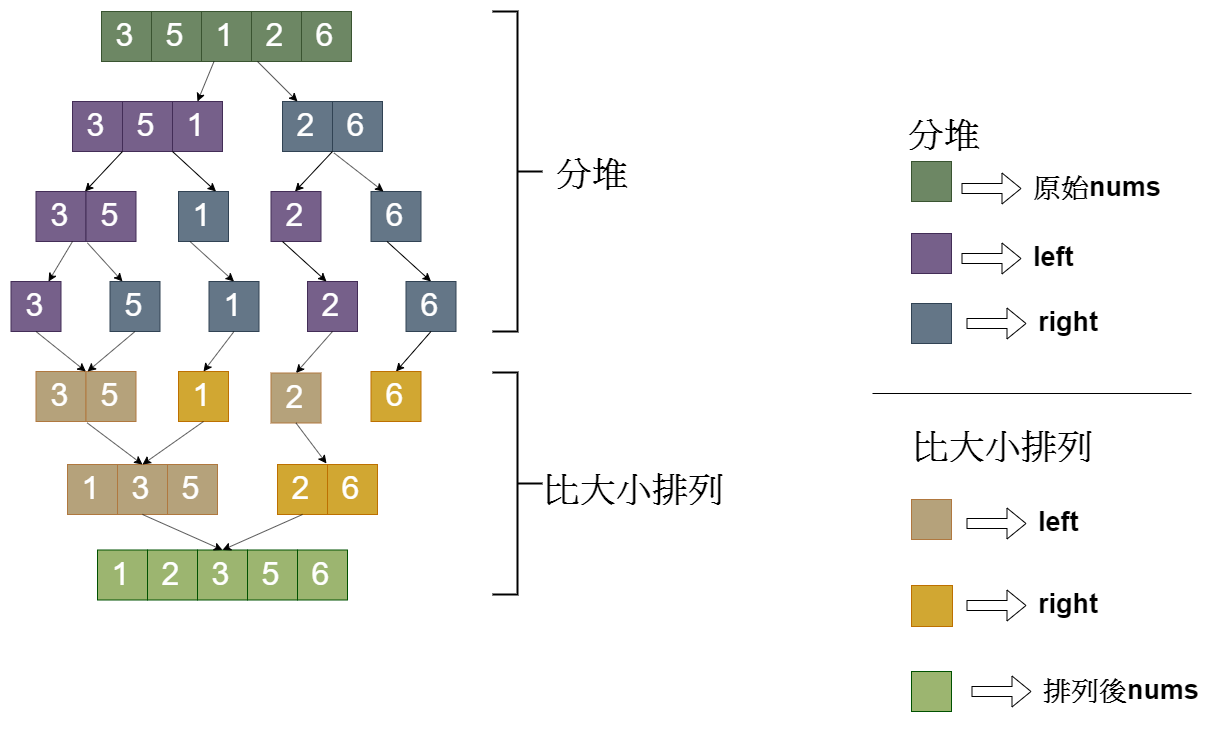

In [4]:
Image(filename='C:/Users/User/Desktop/merge_sort.png')